In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
data = pd.read_csv("part_a.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep'],
      dtype='object')

In [5]:
y = data['VisitorType']
X = data.drop('VisitorType', axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [8]:
scaler = MinMaxScaler()
#1- training: fit
scaler.fit(X_train_org)
#2 - transform X_train
X_train = scaler.transform(X_train_org)
#combine 1 and 2: X_train = scaler.fit_transform(X_train_org)
#3- Transform X_test
X_test = scaler.transform(X_test_org)

In [9]:
y_train.unique()

array([1, 0, 2], dtype=int64)

In [10]:
Y_train = pd.get_dummies(y_train)
Y_train.shape

(9237, 3)

In [11]:
Y_test = pd.get_dummies(y_test)

In [12]:
X_train.shape

(9237, 26)

In [17]:
from keras import Sequential
from keras.layers import Dense

#1- create model
model = Sequential()
#input layer
model.add(Dense(64, activation = 'relu', input_dim = 26))
#output layer
model.add(Dense(3, activation = 'softmax'))

#2- compile: create computational graph
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

#3- fit: training
model.fit(X_train, Y_train, epochs = 5, batch_size = 128)

Epoch 1/5
9237/9237 [==============================] - 0s 15us/step - loss: 0.7309 - accuracy: 0.7803
Epoch 2/5
9237/9237 [==============================] - 0s 9us/step - loss: 0.4563 - accuracy: 0.8571
Epoch 3/5
9237/9237 [==============================] - 0s 9us/step - loss: 0.4185 - accuracy: 0.8571
Epoch 4/5
9237/9237 [==============================] - 0s 11us/step - loss: 0.4036 - accuracy: 0.8571
Epoch 5/5
9237/9237 [==============================] - 0s 11us/step - loss: 0.3938 - accuracy: 0.8572


In [18]:
#4 - evaluation
model.evaluate(X_train, Y_train)

9237/9237 [==============================] - 0s 20us/step


[0.38856882343460525, 0.8572047352790833]

In [19]:
model.evaluate(X_test, Y_test)

3079/3079 [==============================] - 0s 21us/step


[0.39780651347983303, 0.850925624370575]

In [20]:
model.predict(X_test)

array([[0.884186  , 0.09964449, 0.01616951],
       [0.95114034, 0.0446874 , 0.00417224],
       [0.92010766, 0.0760567 , 0.00383554],
       ...,
       [0.89059377, 0.09811392, 0.01129226],
       [0.90855676, 0.08176804, 0.00967518],
       [0.9375092 , 0.05662571, 0.00586513]], dtype=float32)

In [23]:
model.predict_classes(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Fashion MNIST

## Model 1: Perceptron

In [26]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

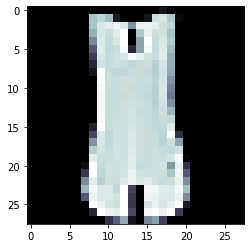

In [34]:
%matplotlib inline

plt.imshow(x_train[4], cmap = 'bone')

In [35]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [36]:
28*28

784

In [37]:
X_train = x_train.reshape(60000, 784).astype('float32')
X_test = x_test.reshape(10000, 784).astype('float32')

X_train /= 255
X_test /= 255

In [38]:
X_train.shape

(60000, 784)

In [39]:
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)
Y_train.shape

(60000, 10)

In [49]:
from keras import Sequential
from keras.layers import Dense

#1- create model
model1 =Sequential()
#input layer
model1.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
#hidden 
#model1.add(Dense(16, activation = 'relu'))
#output layer
model1.add(Dense(10, activation = 'softmax'))

#2 - compile: computational graph
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#3 - fit
model1.fit(X_train, Y_train, epochs = 20, batch_size = 128)

Epoch 1/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.6388 - accuracy: 0.7865
Epoch 2/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.4537 - accuracy: 0.8448
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.4183 - accuracy: 0.8546
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3976 - accuracy: 0.8619
Epoch 5/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3840 - accuracy: 0.8651
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3729 - accuracy: 0.8702
Epoch 7/20
60000/60000 [==============================] - 1s 13us/step - loss: 0.3629 - accuracy: 0.8720
Epoch 8/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.3562 - accuracy: 0.8739
Epoch 9/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.3444 - accuracy: 0.8771
Epoch 10/20
60000/60000 [==============================

In [47]:
#4- evaluate 
model1.evaluate(X_train, Y_train)

60000/60000 [==============================] - 1s 20us/step


[0.3022057236880064, 0.890999972820282]

In [48]:
model1.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 20us/step


[0.376056042432785, 0.8669999837875366]

## Model 2: Flatten

In [50]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [51]:
X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') /255

In [52]:
X_train.shape

(60000, 28, 28)

In [54]:
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

In [57]:
from keras.layers import Dense, Flatten

#1- create model
model2 = Sequential()
model2.add(Flatten(input_shape = (28, 28)))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

#2- compile
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#3- fit
model2.fit(X_train, Y_train, epochs = 20, batch_size = 128)

Epoch 1/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.6549 - accuracy: 0.7803
Epoch 2/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.4451 - accuracy: 0.8459
Epoch 3/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.4053 - accuracy: 0.8589
Epoch 4/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3837 - accuracy: 0.8663
Epoch 5/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3692 - accuracy: 0.8706
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3546 - accuracy: 0.8751
Epoch 7/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3473 - accuracy: 0.8770
Epoch 8/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.3396 - accuracy: 0.8797
Epoch 9/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.3319 - accuracy: 0.8820
Epoch 10/20
60000/60000 [==============================

In [58]:
#4- evalutaion
model2.evaluate(X_train, Y_train)

60000/60000 [==============================] - 1s 21us/step


[0.2797759306907654, 0.8979166746139526]

In [59]:
model2.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 23us/step


[0.38337223944664, 0.8661999702453613]

## Model 3: CNN

In [60]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [61]:
X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') /255

In [62]:
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

In [63]:
n_c = 1

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [66]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

#1- create the model
model3 = Sequential()
model3.add(Conv2D(kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (28, 28, 1), filters = 64))
model3.add(MaxPooling2D(pool_size = 2))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(10, activation = 'softmax'))

#2- compile
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#3- fit
model3.fit(X_train, Y_train, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 30s 504us/step - loss: 0.5157 - accuracy: 0.8232
Epoch 2/5
60000/60000 [==============================] - 31s 512us/step - loss: 0.3476 - accuracy: 0.8776s - loss: 0.3482 
Epoch 3/5
60000/60000 [==============================] - 30s 499us/step - loss: 0.3132 - accuracy: 0.8893
Epoch 4/5
60000/60000 [==============================] - 30s 508us/step - loss: 0.2949 - accuracy: 0.8949
Epoch 5/5
60000/60000 [==============================] - 31s 514us/step - loss: 0.2814 - accuracy: 0.9003


In [67]:
#4- Evaluate 
model3.evaluate(X_train, Y_train)

60000/60000 [==============================] - 10s 160us/step


[0.261528915087382, 0.9075166583061218]

In [68]:
model3.evaluate(X_test, Y_test)

10000/10000 [==============================] - 2s 162us/step


[0.30405619673728945, 0.8906000256538391]